In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
dataset = pd.read_csv("Mall_Customers.csv")      
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
x = dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

In [30]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_dbscan = dbscan.fit_predict(x)

C:\Users\Hxtreme\anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Hxtreme\anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


In [31]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64)

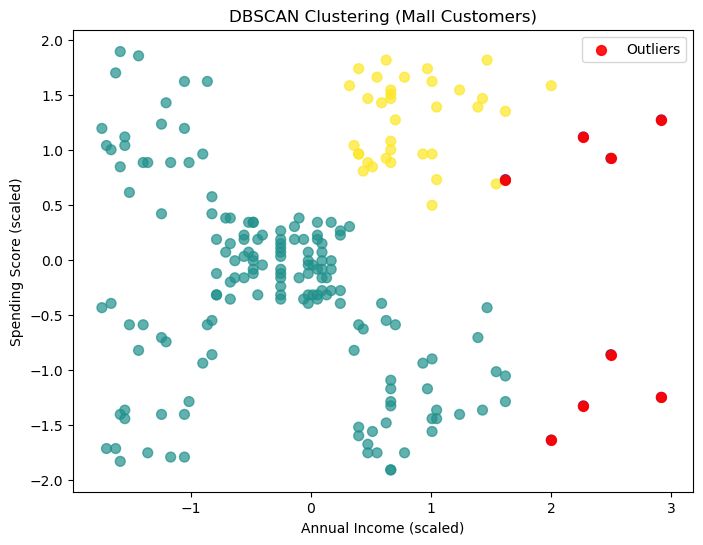

In [37]:
# plot
plt.figure(figsize=(8,6))
plt.scatter(x[:, 0], x[:, 1], c=y_dbscan, cmap="viridis", s=50, alpha=0.7)

# Highlight outliers (label = -1)
outliers = (y_dbscan == -1)
plt.scatter(x[outliers, 0], x[outliers, 1],c="red", s=50, alpha=0.9, label="Outliers")

plt.title("DBSCAN Clustering (Mall Customers)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()